In [78]:
#!pip install tensorflow==2.0.0
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
print(tf.__version__)

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format



2.0.0
The scikit-learn version is 0.22.1.


In [79]:
Liver_dataframe = pd.read_csv("LiverData.csv", sep=",")
Liver_dataframe = Liver_dataframe.reindex(
    np.random.permutation(Liver_dataframe.index))
#for col in Liver_dataframe.columns: 
    #print(col) 
Liver_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 930 to 1192
Data columns (total 28 columns):
Age                                 1384 non-null int64
Gender                              1384 non-null object
BMI                                 1384 non-null int64
Fever                               1384 non-null object
Nausea/Vomting                      1384 non-null object
Headache                            1384 non-null object
Diarrhea                            1384 non-null object
Fatigue & generalized bone ache     1384 non-null object
Jaundice                            1384 non-null object
Epigastric pain                     1384 non-null object
WBC                                 1384 non-null int64
RBC                                 1384 non-null int64
HGB                                 1384 non-null int64
Plat                                1384 non-null int64
AST 1                               1384 non-null int64
ALT 1                               1384 no

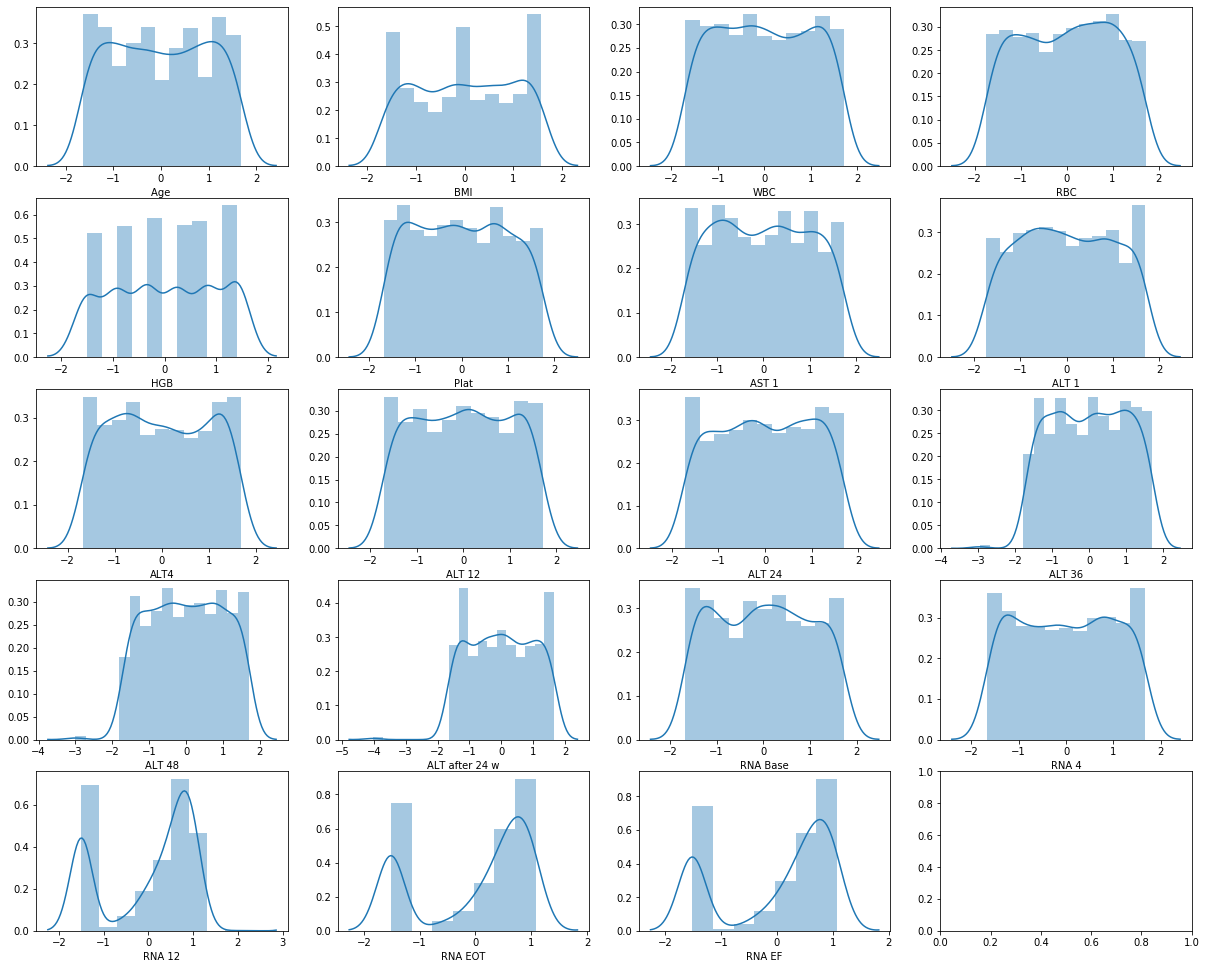

In [87]:
numeric_columns = (Liver_dataframe[['Age ','BMI','WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF']])
categorical_columns=['Gender','Fever','Nausea/Vomting','Headache ','Diarrhea ','Fatigue & generalized bone ache ','Jaundice ','Epigastric pain ','Class']
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=4)
fig.set_size_inches(20.7, 17)
for i, column in enumerate(numeric_columns.columns):
    sns.distplot(numeric_columns[column],ax=axes[i//4,i%4],kde=True,label=column)

In [0]:
scale_columns=['Age ','BMI','WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4']
powertransform=['RNA 12','RNA EOT','RNA EF']

In [0]:
label_encoder = preprocessing.LabelEncoder() 
for i in categorical_columns:
  Liver_dataframe[i]= label_encoder.fit_transform(Liver_dataframe[i])

In [0]:
Liver_dataframe[scale_columns]=StandardScaler().fit_transform(Liver_dataframe[scale_columns])
Liver_dataframe[powertransform]=PowerTransformer(method='yeo-johnson',standardize= True).fit_transform(Liver_dataframe[powertransform])

#ctx=ColumnTransformer(
    #[("norm1",StandardScaler(),['Age ','BMI','WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4']),
     #("powerx",  PowerTransformer(method='yeo-johnson',standardize= True),['RNA 12','RNA EOT','RNA EF']),], remainder = 'passthrough')

    

In [0]:
from sklearn.preprocessing import StandardScaler
def preprocess_features(Liver_dataframe):
  selected_features = Liver_dataframe    
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(Liver_dataframe):  
  output_targets = Liver_dataframe["Class"]
  return output_targets

In [93]:
Liver_dataframe

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Class
930,-0.8,1,-0.1,1,1,0,0,1,0,0,-1.0,-1.5,-0.3,-1.3,0.6,0.2,1.5,1.0,0.9,-0.6,-1.0,-0.1,1.2,-0.7,-1.4,-1.4,-1.4,0
199,0.9,0,0.1,1,0,1,1,0,0,1,-0.6,-1.1,-0.3,1.5,1.1,1.2,1.3,1.5,0.9,1.4,0.5,0.1,1.7,-1.6,1.0,1.4,-0.3,3
1358,-0.0,1,0.8,0,1,1,1,0,1,0,1.3,1.0,1.4,-0.1,1.0,-1.4,0.9,-0.1,0.3,-1.6,-1.2,0.1,-1.1,-0.9,1.0,1.0,1.2,2
861,1.0,0,1.1,1,0,0,0,1,0,0,0.0,0.1,-1.5,-0.5,0.9,0.1,-1.0,-0.4,-0.6,1.1,-1.3,1.6,-1.5,-1.3,-1.4,-1.4,-1.4,2
387,-0.7,0,0.8,0,1,0,0,1,0,1,0.1,1.3,0.8,-1.3,-0.8,1.5,-1.0,1.3,1.2,-1.4,-1.2,-1.2,-1.6,-1.5,-1.4,-1.4,-1.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.8,0,1.6,0,0,1,0,1,0,1,-1.3,1.3,0.2,0.8,-1.1,-1.3,-1.3,1.3,-0.7,1.5,-1.7,-1.1,0.4,0.1,-0.0,0.7,0.1,3
299,0.1,0,-0.1,0,0,1,1,0,0,0,0.9,-1.4,0.2,-0.8,-1.4,-1.4,0.7,0.4,-0.1,0.1,1.7,-0.8,-1.0,-0.8,-0.0,0.7,0.9,1
493,1.3,0,-0.9,1,0,1,0,1,0,1,-1.6,1.0,0.2,0.5,1.0,1.5,-1.3,0.4,1.3,0.3,0.9,0.8,0.3,-1.4,0.4,0.6,-1.1,2
527,0.6,0,-0.9,1,0,0,1,0,0,0,-1.0,0.3,0.8,-0.1,-1.1,1.4,-0.3,-1.0,1.6,1.4,-1.7,-1.6,-1.5,-1.5,0.3,0.2,0.9,3


In [0]:
# Choose the first 970 examples for training.

training_examples = preprocess_features(Liver_dataframe.head(970))
training_targets = preprocess_targets(Liver_dataframe.head(970))
#scaler = ctx.fit(training_examples.values)
#scaledf = scaler.transform(training_examples.values)
scaledf = training_examples
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)

In [95]:
# Choose the first 970 examples for training.

training_examples = preprocess_features(Liver_dataframe.head(970))
training_targets = preprocess_targets(Liver_dataframe.head(970))
#scaler = ctx.fit(training_examples.values)
#scaledf = scaler.transform(training_examples.values)
scaledf = training_examples
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)

# Choose the 415 examples for validation.
validation_examples = preprocess_features(Liver_dataframe.tail(415))
validation_targets = preprocess_targets(Liver_dataframe.tail(415))
#vscaled = scaler.transform(validation_examples.values)
vscaled = validation_examples
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)


# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Class
count,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0,970.0
mean,0.0,0.5,-0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
std,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1
min,-1.6,0.0,-1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.7,-1.7,-1.5,-1.7,-1.7,-1.7,-1.7,-1.7,-1.7,-3.0,-3.0,-4.0,-1.7,-1.7,-1.4,-1.4,-1.4,0.0
25%,-0.8,0.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.9,-0.8,-0.9,-0.8,-0.9,-0.8,-0.9,-0.9,-0.8,-0.8,-0.9,-0.8,-0.9,-0.9,-1.4,-1.4,-1.4,0.0
50%,0.1,1.0,-0.1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.0,0.1,0.2,-0.0,0.0,-0.0,-0.1,0.0,0.0,0.0,-0.0,0.1,0.0,-0.0,0.3,0.3,0.2,2.0
75%,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.8,0.8,0.9,0.8,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.8,0.9,0.9,0.9,2.0
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.7,1.7,1.4,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.7,1.7,4.0,1.4,1.4,3.0


Validation examples summary:


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Class
count,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0,415.0
mean,-0.1,0.5,0.1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,-0.1,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.1,0.0,0.0,-0.0,-0.0,-0.0,-0.1,-0.0,-0.0,1.5
std,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1
min,-1.6,0.0,-1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.7,-1.7,-1.5,-1.7,-1.7,-1.7,-1.7,-1.7,-1.7,-1.7,-1.7,-1.6,-1.7,-1.7,-1.4,-1.4,-1.4,0.0
25%,-0.9,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,-1.0,-0.9,-0.9,-0.9,-0.8,-0.8,-0.9,-0.9,-0.8,-0.9,-0.9,-0.9,-0.9,-1.4,-1.4,-1.4,0.0
50%,-0.1,1.0,0.1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.1,-0.3,0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,-0.1,0.0,-0.0,0.1,0.2,0.2,1.0
75%,0.8,1.0,1.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.8,1.0,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.8,0.9,0.9,0.8,0.8,3.0
max,1.7,1.0,1.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.7,1.7,1.4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.6,1.7,1.7,1.4,1.4,1.4,3.0


Training targets summary:


count   970.0
mean      1.5
std       1.1
min       0.0
25%       0.0
50%       2.0
75%       2.0
max       3.0
Name: Class, dtype: float64

Validation targets summary:


count   415.0
mean      1.5
std       1.1
min       0.0
25%       0.0
50%       1.0
75%       3.0
max       3.0
Name: Class, dtype: float64

In [96]:
Naivemodacc=max(pd.value_counts(Liver_dataframe['Class']))*100/(len(Liver_dataframe['Class']))
Naivemodacc

26.15606936416185

In [101]:
#Baseline Model
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(4,activation=tf.nn.softmax)

  ])


baseline_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model.summary()
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()]) #verbose=0 means no output(silent) hence the printdot is called
print(max(b_history.history['val_accuracy']))


#Reguralization 
l1_model = keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.softmax,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.softmax),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.softmax),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.softmax),
    keras.layers.Dense(4,activation=tf.nn.softmax)
  ])

l1_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])

l2_model = keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.softmax,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.softmax),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.softmax),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.softmax),
    keras.layers.Dense(4,activation=tf.nn.softmax)
  ])

l2_model.compile(loss='sparse_categorical_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])


  
l1_history = l1_model.fit(training_examples, training_targets, epochs=100,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
print(max(l1_history.history['val_accuracy']))
l2_history = l2_model.fit(training_examples, training_targets, epochs=100,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
print(max(l2_history.history['val_accuracy']))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 68        
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________

....................................................................................................1.0

....................................................................................................0.26024097

....................................................................................................0.26024097


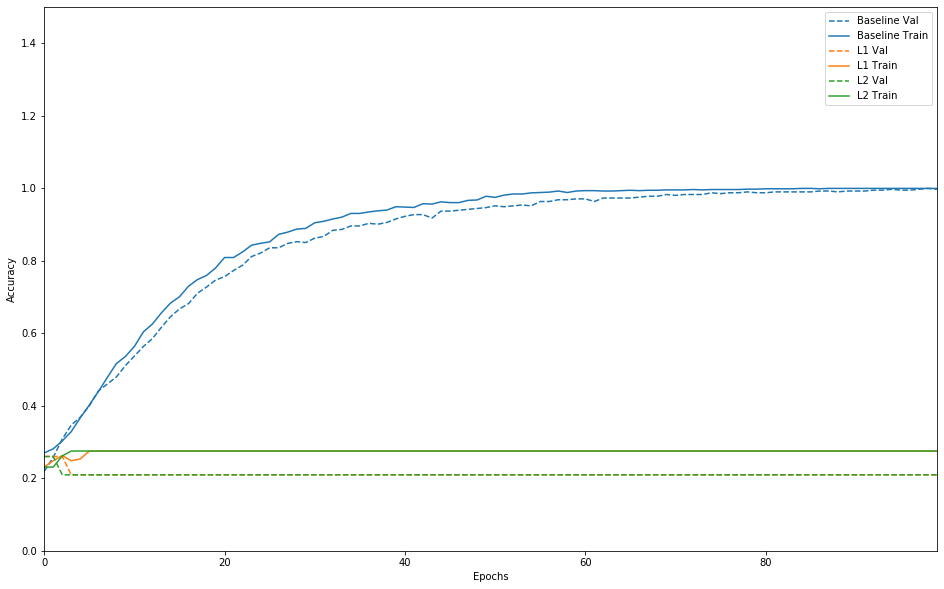

In [102]:
# Plot history Multiple
plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history)])